In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
from google.colab import files
uploaded = files.upload()

# Load the dataset using the actual uploaded filename
data = pd.read_csv("seattle-weather.csv") # Change 'your_dataset.csv' to the actual filename
data.head()


Saving seattle-weather.csv to seattle-weather (1).csv


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64
       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000


<ipython-input-9-136de23dd72c>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


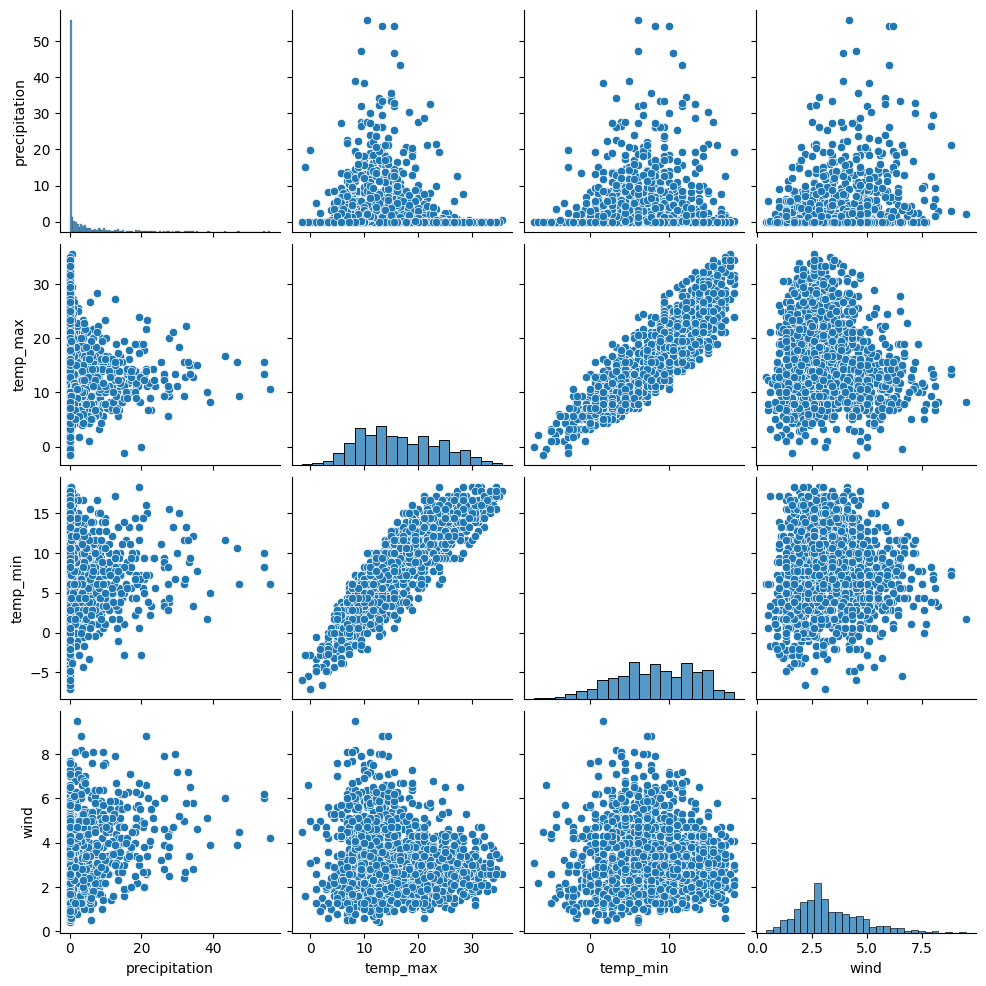

In [9]:
# Check for null values
print(data.isnull().sum())

# Fill or drop missing values
data.fillna(method='ffill', inplace=True)

# Describe the dataset
print(data.describe())

# Visualize the relationships
sns.pairplot(data)
plt.show()


In [12]:
# Example: Predicting temperature based on other features
# Access the column names from the DataFrame
column_names = data.columns

# Check if the columns are present
expected_columns = ['humidity', 'wind_speed', 'pressure']

# Check if each expected column is present in the DataFrame's columns
for col in expected_columns:
    if col not in column_names:
        print(f"Column '{col}' not found in the DataFrame.")

# Make sure the columns exist and use the exact names (case-sensitive)
# If columns exist but have typos, correct them here.
# Alternatively you can rename the columns if you wish: data.rename(columns={"old_name": "new_name"}, inplace=True)
X = data[['precipitation', 'wind', 'temp_max']]  # Independent variables, change with correct names
y = data['temp_min']  # Dependent variable
# Example: Predicting temperature based on other features
# Access the column names from the DataFrame
column_names = data.columns

# Check if the columns are present
expected_columns = ['humidity', 'wind_speed', 'pressure']

# Check if each expected column is present in the DataFrame's columns
for col in expected_columns:
    if col not in column_names:
        print(f"Column '{col}' not found in the DataFrame.")

# Make sure the columns exist and use the exact names (case-sensitive)
# If columns exist but have typos, correct them here.
# Alternatively you can rename the columns if you wish: data.rename(columns={"old_name": "new_name"}, inplace=True)
X = data[['precipitation', 'wind', 'temp_max']]  # Independent variables, change with correct names
y = data['temp_min']  # Dependent variable

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Column 'humidity' not found in the DataFrame.
Column 'wind_speed' not found in the DataFrame.
Column 'pressure' not found in the DataFrame.
Column 'humidity' not found in the DataFrame.
Column 'wind_speed' not found in the DataFrame.
Column 'pressure' not found in the DataFrame.


In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [15]:
# Evaluate predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Root Mean Squared Error: 2.2946959127400897
R² Score: 0.7992851344876728


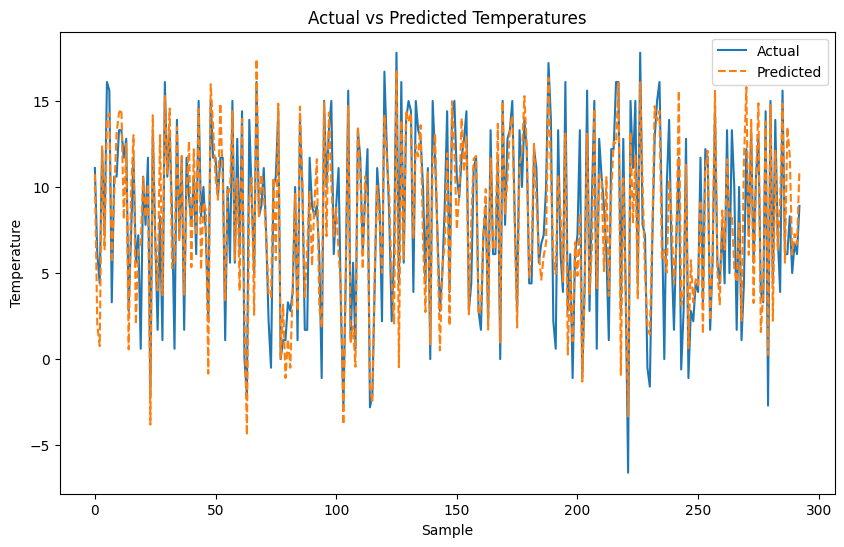

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='dashed')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperatures')
plt.show()


In [17]:
import joblib

# Save the model
joblib.dump(model, 'weather_prediction_model.pkl')

# Load the model
# loaded_model = joblib.load('weather_prediction_model.pkl')


['weather_prediction_model.pkl']